In [1]:
import pandas as pd
import numpy as np    
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef
from sklearn import metrics

In [2]:
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Let's see a concise summary of the dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The column containing Id numbers of persons is not much of use here, so dropping the 'id' column.

In [4]:
df.drop(columns ='id', axis=1, inplace=True)

The column named 'bmi' has some missing values. Let us check it.

In [5]:
df['bmi'].isnull().sum()

201

The number of missing values in the column 'bmi' is 201. Replacing the missing data points with mean of the column.

In [6]:
bmi_mean=df['bmi'].mean()
df['bmi'].replace(np.nan, bmi_mean, inplace=True)

#### Basic statistical summary of the data.

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# number of entries for each categories in 'stroke' column
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

So the entries for 'stroke' = 1 is just 249 out of 5110 rows (which is about 5%). So out of 5110 samples, persons who had stroke is 5%.

## A- Visualising the data
### 1. Age and Gender 

<AxesSubplot:xlabel='stroke', ylabel='age'>

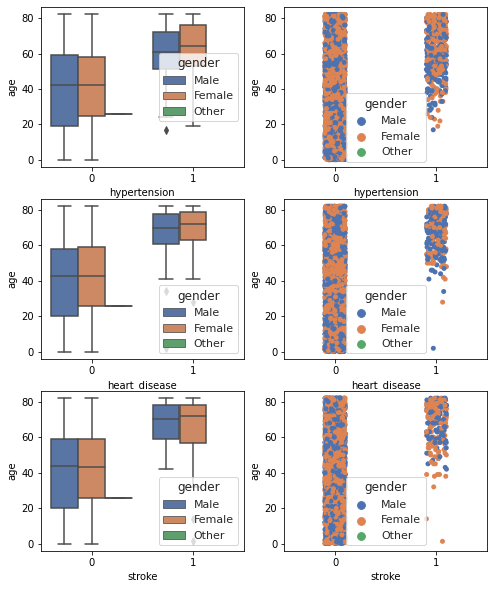

In [9]:
fig, axs = plt.subplots(3,2,figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.boxplot(x=df.hypertension, y=df.age,hue=df.gender, data = df, ax =axs[0,0])
sns.stripplot(x=df.hypertension, y=df.age,hue=df.gender, data = df, ax =axs[0,1])

sns.boxplot(x=df.heart_disease, y=df.age,hue=df.gender, data = df, ax = axs[1,0])
sns.stripplot(x=df.heart_disease, y=df.age,hue=df.gender, data = df, ax = axs[1,1])

sns.boxplot(x=df.stroke, y=df.age,hue=df.gender, data = df, ax = axs[2,0])
sns.stripplot(x=df.stroke, y=df.age,hue=df.gender, data = df, ax = axs[2,1])

We want to know the average age for patients of hypertension, heart_disease and stroke for males and females.

In [10]:
a =df.groupby(['hypertension', 'gender'])
print("Average 'age' for hypertension: ",'\n',a['age'].aggregate('mean'),'\n')

b =df.groupby(['heart_disease','gender'])
print("Average 'age' for Heart-disease : ",'\n' ,b['age'].aggregate('mean'),'\n')

c=df.groupby(['stroke','gender'])
print("Average 'age' for stroke : ",'\n' ,c['age'].aggregate('mean'))


Average 'age' for hypertension:  
 hypertension  gender
0             Female    41.764768
              Male      40.331410
              Other     26.000000
1             Female    63.380435
              Male      60.833333
Name: age, dtype: float64 

Average 'age' for Heart-disease :  
 heart_disease  gender
0              Female    42.747185
               Male      40.413607
               Other     26.000000
1              Female    69.513274
               Male      67.269939
Name: age, dtype: float64 

Average 'age' for stroke :  
 stroke  gender
0       Female    42.601935
        Male      41.083388
        Other     26.000000
1       Female    67.137021
        Male      68.500000
Name: age, dtype: float64


**So from the above analysis we can say**

 **1. The average age for Hypertension is about 63 years in Females and 61 year in Males. It is slightly more in case female.**

**2. The plot for occurrence of heart-disease vs age very clearly depicts that for people below age of 40 years have very rare cases of Heart-disease. On an average for people of age of about 70 years it is most common. There is not much difference in average age for Male and Female for heart-disease.**

**3. The average age of Stroke for Males and Females are not very different (about 67 years in Female and 69 years in Males).**

**4. The occurrence of any of the above three diseases is very rare for people of age below 40 years and high for people of age 60 years and above for all.**

### 2. Hypertension 


 Stroke vs Hypertension Frequency table :  



hypertension,0,1,All
stroke,,,
0,0.866732,0.084540,0.951272
1,0.035812,0.012916,0.048728
All,0.902544,0.097456,1.000000


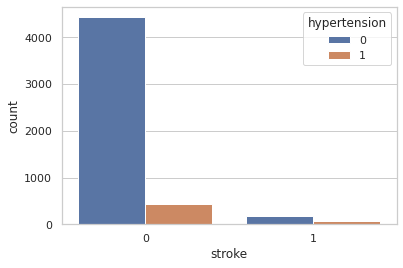

In [11]:
plt.plot(figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.countplot(data = df,  x='stroke', hue='hypertension')

print('\n','Stroke vs Hypertension Frequency table : ','\n')
pd.crosstab(df['stroke'], 
                   df['hypertension'],  normalize='all', margins = True)

**Among 90% of persons who are not having hypertension about 87% are those who did not get stroke as well.**

### 3. Heart-disease


 Stroke vs Heart-disease Frequency table:  



heart_disease,0,1,All
stroke,,,
0,0.906458,0.044814,0.951272
1,0.039530,0.009198,0.048728
All,0.945988,0.054012,1.000000


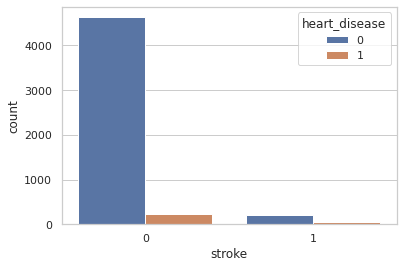

In [12]:
plt.plot(figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.countplot(data = df, x='stroke', hue='heart_disease')

print('\n','Stroke vs Heart-disease Frequency table: ', '\n')
pd.crosstab(df['stroke'], 
                  df['heart_disease'], normalize='all', margins = True)

**The data shows 90% of persons who do not have heart-disease don't get stroke.**


### 4. Marital-status

<AxesSubplot:xlabel='ever_married', ylabel='count'>

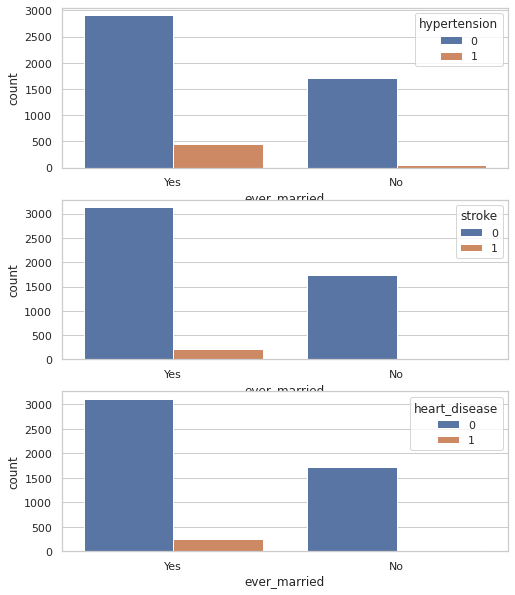

In [13]:
fig, axs = plt.subplots(3, figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.countplot(data = df, x='ever_married', hue='hypertension', ax=axs[0])

sns.countplot(data = df, x='ever_married', hue='stroke', ax=axs[1])

sns.countplot(data = df, x='ever_married', hue='heart_disease', ax= axs[2])


In [14]:
pd.crosstab([df['hypertension'], df['heart_disease'],df['stroke']], 
            df['ever_married'])

ever_married                         No   Yes
hypertension heart_disease stroke            
0            0             0       1666  2585
                           1         15   134
             1             0         20   158
                           1          3    31
1            0             0         37   344
                           1          7    46
             1             0          5    46
                           1          4     9

**Those who were ever-married have more cases of hypertension, heart-disease and stroke than those who were not.**

### 5.Work-type
Let us see if there is any trend in the type of work a person does and disease


<AxesSubplot:xlabel='work_type', ylabel='count'>

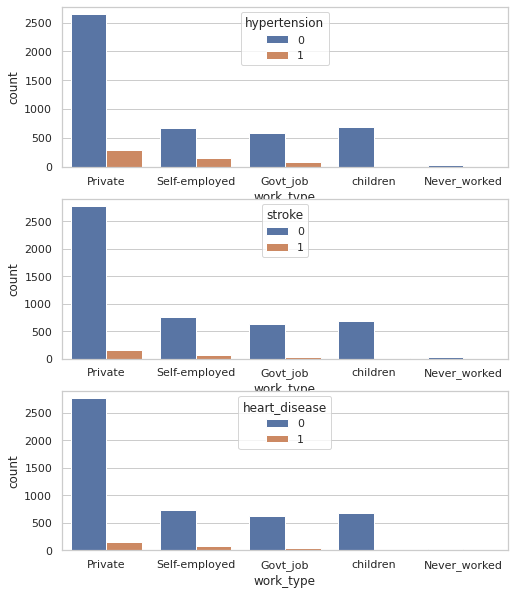

In [15]:
fig, axs = plt.subplots(3, figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.countplot(data = df, x='work_type', hue='hypertension', ax=axs[0])

sns.countplot(data = df, x='work_type', hue='stroke', ax=axs[1])

sns.countplot(data = df, x='work_type', hue='heart_disease', ax= axs[2])

**The people in private-sector are at higher risk to develop any of these diseases. People who never-worked are at minimal risk.**

### 6. Residence-type
Let us now find out trend between Residence-type and diseases.

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

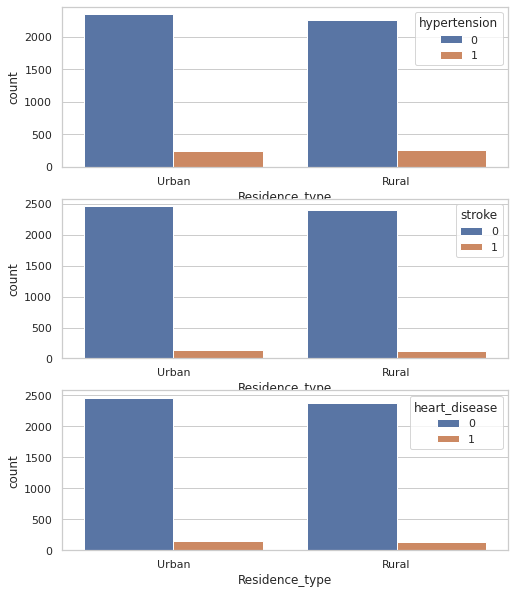

In [16]:
fig, axs = plt.subplots(3, figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.countplot(data = df, x='Residence_type', hue='hypertension', ax=axs[0])

sns.countplot(data = df, x='Residence_type', hue='stroke', ax=axs[1])

sns.countplot(data = df, x='Residence_type', hue='heart_disease', ax= axs[2]) 

**The countplot for hypertension, heart-disease and stroke for both (urban and rural) categories of Residence-type does not show major difference between each residents for their diseases. So we can say residence location does not has any significant role in causing stroke.**

### 7. Smoking_status

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

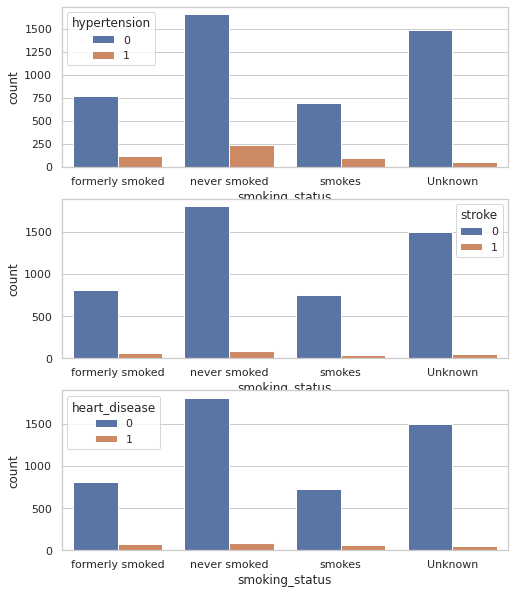

In [17]:
#     smoking_status    

fig, axs = plt.subplots(3, figsize=(8,10))
sns.set_theme(style='whitegrid')
sns.countplot(data = df, x='smoking_status', hue='hypertension', ax=axs[0])

sns.countplot(data = df, x='smoking_status', hue='stroke', ax=axs[1])

sns.countplot(data = df, x='smoking_status', hue='heart_disease', ax= axs[2]) 

In [18]:
pd.crosstab(df['smoking_status'], df['hypertension'], normalize = 'columns')

hypertension,0,1
smoking_status,,
Unknown,0.323504,0.104418
formerly smoked,0.165872,0.240964
never smoked,0.359931,0.465863
smokes,0.150694,0.188755


**From all the patients of Hypertension, highest 46% are from never-smoked group while 24% are from 'formerly-smoked' and and 18% 'smokes' group. For 10% patients of Hypertension patients the smoking-status is unkonwn.**

**Although for many(52) of the patients their smoking-status is not-known. But we can make inference based on fact that a big percentage (46% which in numbers is 234 out of 498) of stroke-patients never-smoked.** 

### 8. Body-Mass-Index (bmi)
Let us find out if there is any relation among these disease data and bmi.

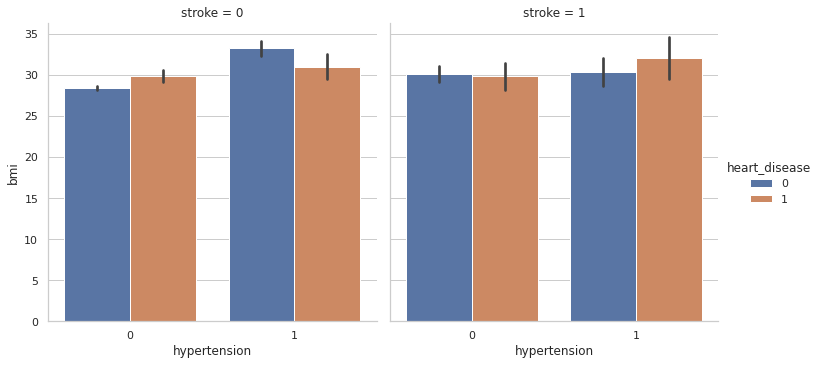

In [19]:
sns.catplot(x="hypertension", y="bmi",
                hue="heart_disease", col="stroke",
                data=df, kind="bar",
                height=5);

### 9. Average Glucose-level

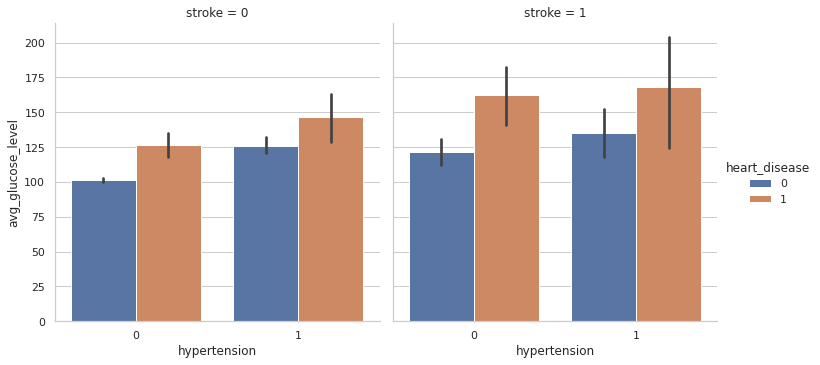

In [20]:
sns.catplot(x="hypertension", y="avg_glucose_level",
                hue="heart_disease", col="stroke",
                data=df, kind="bar",
                height=5);

In [21]:
b =df.groupby(['hypertension', 'gender'])
print("Average 'avg_glucose_level' for hypertension: ",'\n'*2 ,b['avg_glucose_level'].aggregate('mean'),'\n')

c =df.groupby(['heart_disease','gender'])
print("Average 'avg_glucose_level' for Heart-disease : ",'\n'*2 ,c['avg_glucose_level'].aggregate('mean'),'\n')

a=df.groupby(['stroke','gender'])
print("Average 'avg_glucose_level' for stroke : ",'\n' *2 ,a['avg_glucose_level'].aggregate('mean'))

Average 'avg_glucose_level' for hypertension:  

 hypertension  gender
0             Female    101.596652
              Male      106.337813
              Other     143.330000
1             Female    128.294855
              Male      132.543874
Name: avg_glucose_level, dtype: float64 

Average 'avg_glucose_level' for Heart-disease :  

 heart_disease  gender
0              Female    102.533624
               Male      107.125999
               Other     143.330000
1              Female    142.917788
               Male      132.590613
Name: avg_glucose_level, dtype: float64 

Average 'avg_glucose_level' for stroke :  

 stroke  gender
0       Female    103.051753
        Male      107.255112
        Other     143.330000
1       Female    124.414397
        Male      143.159352
Name: avg_glucose_level, dtype: float64


**Mean glucose-level among hypertension patients is slightly higher for males(132) than females(128)**

**The mean value of glucose-level in Heart-disease patients are higher for females(about 143) than that for males(about 132)**

**The stroke patients who have mean-glucose level of about 124 for females and 143 for males. Here females show lower mean value of glucose level that for males**

Overall, we can say that high glucose level is common among all these patients.

## B- Preprocessing
Let us find all the columns that contain string type categorical data. 
And using Scikit-learn library change the string type categorical variable columns to numerical type.

In [22]:
cat_col = df.select_dtypes(['object']).columns
print(cat_col)
label_encode = LabelEncoder()    #initializing an object of class LabelEncoder
for i in df.columns:
    df[i] = label_encode.fit_transform(df[i])
df.head()

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


Let us see correlation table and Heat-map.

In [23]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030616,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.050396,-0.026778,-0.062581,0.008929
age,-0.030616,1.000000,0.273891,0.260691,0.678447,-0.370303,0.013461,0.150619,0.347834,0.272053,0.242122
hypertension,0.020994,0.273891,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.121690,0.156654,0.111038,0.127904
heart_disease,0.085447,0.260691,0.108306,1.000000,0.114644,-0.028023,0.003092,0.113220,0.042917,0.048460,0.134914
ever_married,-0.031005,0.678447,0.164243,0.114644,1.000000,-0.352722,0.006261,0.104863,0.348948,0.259647,0.108340
work_type,0.056422,-0.370303,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.026725,-0.310049,-0.305927,-0.032316
Residence_type,-0.006738,0.013461,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.012632,0.002529,0.008237,0.015458
avg_glucose_level,0.050396,0.150619,0.121690,0.113220,0.104863,-0.026725,-0.012632,1.000000,0.118591,0.041203,0.088833
bmi,-0.026778,0.347834,0.156654,0.042917,0.348948,-0.310049,0.002529,0.118591,1.000000,0.227303,0.042307
smoking_status,-0.062581,0.272053,0.111038,0.048460,0.259647,-0.305927,0.008237,0.041203,0.227303,1.000000,0.028123


<AxesSubplot:>

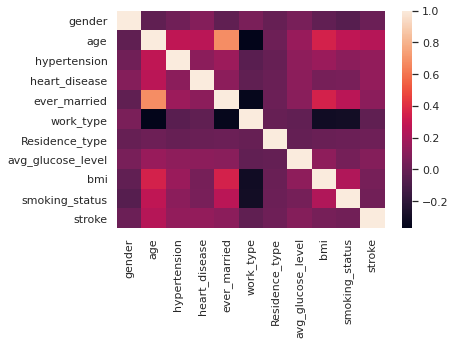

In [24]:
plt.plot(figsize=(15,15))
sns.heatmap(df.corr())

###  Feature-selection
**Feature selection technique permits researchers to choose measures that are maximally predictive of relevant outcomes, even when there are interactions or nonlinearities. These techniques facilitate decisions about which measures may be dropped from a study while maintaining efficiency of prediction**

**Let us choose best features, using SelectKBest method, which is a univariate feature selection method, using f_classif as scoring function. For classification, scoring functions based on F-test estimate the degree of linear dependency between two random variables.**

In [25]:
#drop target columns
drop_col = ['stroke']

#dataset containing the features columns
x_feat = df.iloc[:,0:10]     #independent variable (predictors)
y_tar = df['stroke']      # target feature column

best_feat = SelectKBest(score_func = f_classif, k='all')
features_fitted = best_feat.fit(x_feat, y_tar)
df_scores = pd.DataFrame(features_fitted.scores_)
df_columns = pd.DataFrame(x_feat.columns)


In [26]:
# concatenate dataframes
feature_scores = pd.concat([df_columns , df_scores], axis =1)
feature_scores.columns = ['Features','Score']

#sorting the feature dataframe based on score values
feature_scores.sort_values(by='Score',ascending=False)
feature_scores

,Features,Score
0,gender,0.407266
1,age,318.094573
2,hypertension,84.953542
3,heart_disease,94.698406
4,ever_married,60.667230
5,work_type,5.340019
6,Residence_type,1.220842
7,avg_glucose_level,40.629589
8,bmi,9.159169
9,smoking_status,4.043033


Selecting features with scores greater than 60

In [27]:
cols = feature_scores[feature_scores['Score']>60]['Features']
print('Choosen features : ','\n', cols)

Choosen features :  
 1              age
2     hypertension
3    heart_disease
4     ever_married
Name: Features, dtype: object


### Normalizing the dataset.

In [28]:
x=df[cols].values
y=df['stroke'].values
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)

### Splitting the dataset into training and testing sets.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 50, test_size =0.25)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((3832, 4), (1278, 4), (3832,), (1278,))

### **Modelling**

### Let us now implement Logistic regression algorithm.

Let's build our model using LogisticRegression from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.  C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.



F1 Score for Logistic regression model : 0.00
Accuracy : 0.96


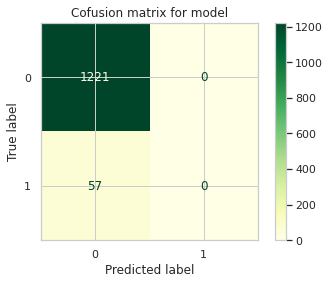

In [30]:
#from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.1, solver='liblinear').fit(x_train, y_train)

yp_lr = LR.predict(x_test)

#f1_score:
yf = f1_score(y_test,yp_lr )

ya = metrics.accuracy_score(y_test,yp_lr)     

print('F1 Score for Logistic regression model : %.2f'%yf)
print('Accuracy : %.2f'%ya)

plot_confusion_matrix(LR, x_test, y_test,cmap='YlGn')
plt.title('Cofusion matrix for model')

plt.show()  

**As shown by confusion matrix the Logistic regression classifier gives zero true-positives so precision will be zero.**

**The zero value of F1-score shows that the model is failure.**

Now let us try to model using three more algorithms namely: K-Nearest Neighbor, Decision Trees and Support Vector Machine. Then we will compare their results using different evaluation matrices.

In [31]:
# declaring three list variables to strore various evaluation matrices
acc_val = []
f1_val = []
macc_val = []

### Implementing KNearest neighbour

In [32]:
# Selecting best K-value(number of neighbours) based upon the accuracy-score
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
for n in range (1,ks):
    neg = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    ypred_knn = neg.predict(x_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test, ypred_knn)
    std_acc[n-1]= np.std(ypred_knn==y_test)/np.sqrt(ypred_knn.shape[0])
print(' Best accuracy of %.3f '%mean_acc.max(), 'was with k = ', mean_acc.argmax())

 Best accuracy of 0.955  was with k =  7


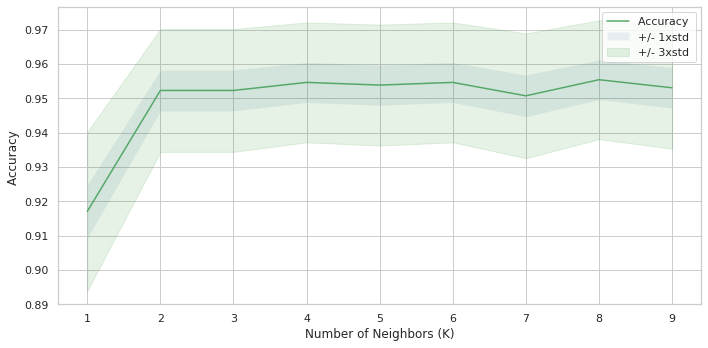

In [33]:
plt.figure(figsize=(10,5))
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

**The plot above depicts the changing values of accuracy with K-values.**

In [34]:
#Finding Training and testing set accuracy for best k
knn = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)

train_scores= metrics.accuracy_score(y_train, knn.predict(x_train))
test_scores= metrics.accuracy_score(y_test, knn.predict(x_test))
print(' Train-set accuracy with k=7 is: %.3f'%train_scores)
print(' Test-set accuracy with k=7 is: %.3f'%test_scores)
k_acc = metrics.accuracy_score(y_test, ypred_knn)
acc_val.append(k_acc)
#print(' Accuracy-score : %.3f'%k_acc)

 Train-set accuracy with k=7 is: 0.950
 Test-set accuracy with k=7 is: 0.951


### Implementing Decision tree

In [35]:
d_tree = DecisionTreeClassifier(criterion='entropy')
d_tree.fit(x_train, y_train)
ypred_tree = d_tree.predict(x_test)
#Evaluating the model
d_acc =  metrics.accuracy_score(y_test, ypred_tree)
acc_val.append(d_acc)

### Implementing Support Vector Machine

**SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.**
**The most used type of kernel function is RBF. Because it has localized and finite response along the entire x-axis.**

In [36]:
clf = svm.SVC(kernel='rbf')
sv = clf.fit(x_train, y_train)
ypred_svm = clf.predict(x_test)
s_acc = accuracy_score(y_test, ypred_svm)
acc_val.append(s_acc)

## **Evaluating the model**

### Accuracy-score
**Let us compare the accuracy of the three algorithms for given dataset**

In [37]:
print('KNN model accuracy : %.3f' %k_acc)
print('Decision tree model accuracy : %.3f'%d_acc)
print('SVM model accuracy : %.3f' %s_acc)

KNN model accuracy : 0.953
Decision tree model accuracy : 0.954
SVM model accuracy : 0.955


**So accuracy scores for all of te chosen models are equal.**

### Computing the Confusion Matrix

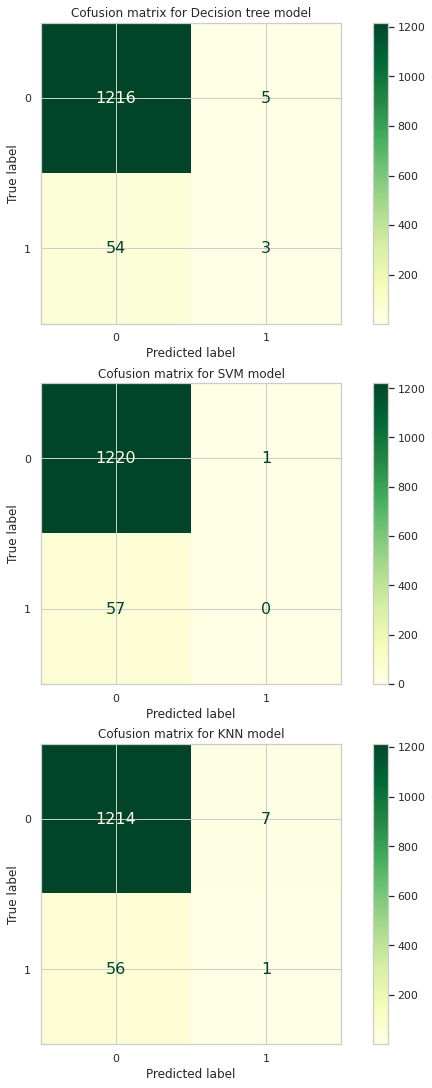

In [38]:
fig, axs = plt.subplots(nrows=3, figsize=(10,15), constrained_layout = True)
plt.rcParams['font.size'] = '16'
plot_confusion_matrix(d_tree, x_test, y_test,ax=axs[0],cmap='YlGn')
axs[0].set_title('Cofusion matrix for Decision tree model')

plot_confusion_matrix(sv, x_test, y_test,ax = axs[1],cmap='YlGn')
axs[1].set_title('Cofusion matrix for SVM model')

plot_confusion_matrix(knn, x_test, y_test, ax = axs[2],cmap='YlGn')
axs[2].set_title('Cofusion matrix for KNN model')
plt.show()  

#### As seen from confusion matrices, 
**1. The True-Negatives for support vector machine model highest in numbers.**

**2. The decision tree model gives highest True-Positives followed by KNN model while SVM model fails to give any True-Positives.**

Here we are trying to build a model to predict of a person has stroke or not, so we want to capture the disease i.e as many positives as possible. Decision tree classifiers performs best among the three models in capture highest number of True-Positives (as desirable)

### Classification Report

In [39]:
np.set_printoptions(precision=2)
t_n = ['Stroke = 0', 'Stroke = 1']
print('\n',"Classification report for KNN classifier")
print(classification_report(y_test, ypred_knn, labels=[0,1], target_names=t_n))
print('\n',"Classification report for Decision tree classifier")
print(classification_report(y_test, ypred_tree, labels=[0,1], target_names=t_n))
print('\n',"Classification report for SVM classifier")
print(classification_report(y_test, ypred_svm, labels=[0,1],target_names=t_n))


 Classification report for KNN classifier
              precision    recall  f1-score   support

  Stroke = 0       0.96      1.00      0.98      1221
  Stroke = 1       0.00      0.00      0.00        57

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278


 Classification report for Decision tree classifier
              precision    recall  f1-score   support

  Stroke = 0       0.96      1.00      0.98      1221
  Stroke = 1       0.38      0.05      0.09        57

    accuracy                           0.95      1278
   macro avg       0.67      0.52      0.53      1278
weighted avg       0.93      0.95      0.94      1278


 Classification report for SVM classifier
              precision    recall  f1-score   support

  Stroke = 0       0.96      1.00      0.98      1221
  Stroke = 1       0.00      0.00      0.00        57

    accuracy                           0.95

**The average Precision and Recall are highest for Decision tree**

**The F1 score**

In [40]:
print('F1-score for the KNN model is : %.3f '  %f1_score(y_test, knn.predict(x_test)))
print('F1-score for the decision tree model is : %.3f'%f1_score(y_test, ypred_tree))
print('F1-score for the support vector machine model : %.3f' %f1_score(y_test,ypred_svm))
f1_val.append(f1_score(y_test, knn.predict(x_test)))
f1_val.append(f1_score(y_test, ypred_tree))
f1_val.append(f1_score(y_test,ypred_svm))

F1-score for the KNN model is : 0.031 
F1-score for the decision tree model is : 0.092
F1-score for the support vector machine model : 0.000


**The F1-score for decision tree classifier is higher than the other two classifiers.**

### Matthews correlation coefficient
#### The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.”
#### The Matthews correlation coefficient (MCC), is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

In [41]:
print("The Matthews correlation coefficient for Decision tree model : %.3f" %matthews_corrcoef(y_test, ypred_tree))
print("The Matthews correlation coefficient for K nearest neighbour model : %.3f" %matthews_corrcoef(y_test, knn.predict(x_test)))
print("The Matthews correlation coefficient for SVM model : %.3f" %matthews_corrcoef(y_test, ypred_svm))
macc_val.append(matthews_corrcoef(y_test, knn.predict(x_test)))
macc_val.append(matthews_corrcoef(y_test, ypred_tree))
macc_val.append(matthews_corrcoef(y_test, ypred_svm))

The Matthews correlation coefficient for Decision tree model : 0.127
The Matthews correlation coefficient for K nearest neighbour model : 0.031
The Matthews correlation coefficient for SVM model : -0.006


#### Decision Tree model has highest matthews correlation coefficient among the chosen models.

In [42]:
eval_mat = pd.DataFrame(list(zip(acc_val, f1_val, macc_val)), 
                        columns=['Accuracy','F1_score','Matthews_cor_coef'],
                       index = ['KNN', 'Decision_tree', 'SVM'])
eval_mat

,Accuracy,F1_score,Matthews_cor_coef
KNN,0.953052,0.030769,0.030912
Decision_tree,0.953834,0.092308,0.127033
SVM,0.954617,0.000000,-0.006046


Analyzing the various evaluation matrices for our models we clearly see that the Decision tree classifier performs best among the three classifiers.

### Precision-Recall curves for the three classifiers

Text(0.5, 1.0, 'Precision-Recall curve for different models')

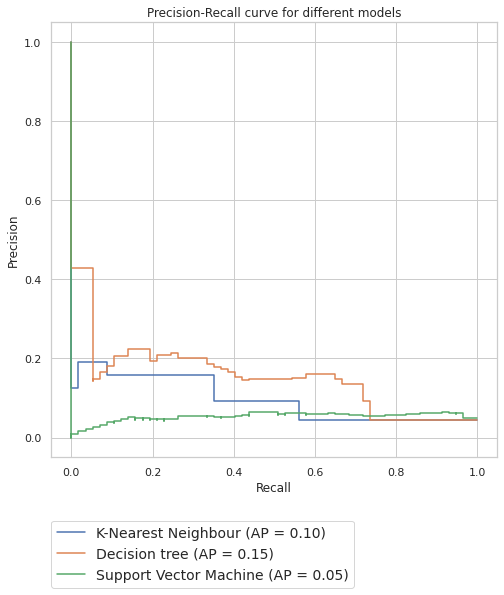

In [43]:
fig, axs = plt.subplots(figsize=(8,8))
plot_precision_recall_curve(knn, x_test, y_test, name = 'K-Nearest Neighbour',ax=axs)
plot_precision_recall_curve(d_tree, x_test, y_test, name = 'Decision tree',ax=axs)
plot_precision_recall_curve(clf, x_test, y_test, name = 'Support Vector Machine', ax=axs)
plt.legend(loc=(0, -.30), prop=dict(size=14))
plt.title('Precision-Recall curve for different models')

### Conclusion
The precision-recall curve for decision matrix has higher area under the curve, thus confirming that it is better than the other two models, This is in agreement with our conclusion that decision tree classifier is best when compared to K-nearest neighbour and Support Vector Machine.
